In [1]:
from alprLib.Yolo import Yolo
from alprLib.EasyOCR import Reader
import cv2
from matplotlib import pyplot as plt

## Initialisation

In [2]:
reader = Reader()
yolo = Yolo(weight_path='./yolo_weights/eu_dataset_256_160/yolov4-tiny_best_eudataset_downsampled.weights', config_path='./yolo_weights/eu_dataset_256_160/yolov4-tiny_downsampled.cfg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Initializing EasyOCR...
EasyOCR initialized.
Initializing Yolo...
Using weights: ./yolo_weights/eu_dataset_256_160/yolov4-tiny_best_eudataset_downsampled.weights
Using config: ./yolo_weights/eu_dataset_256_160/yolov4-tiny_downsampled.cfg
Using dims: (256, 160)
Yolo initialized.


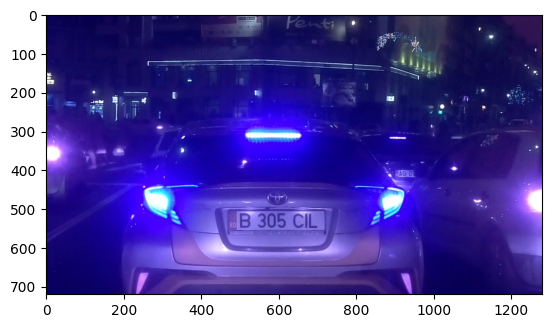

In [3]:
img = cv2.imread("./eu_dataset/images/dayride_type1_001#t=894.jpg")
plt.imshow(img)

## Plate detection with Yolo Tiny v4

In [4]:
bboxes = yolo.find_bboxes(img)
bboxes

[[461, 501, 258, 66], [894, 401, 69, 25]]

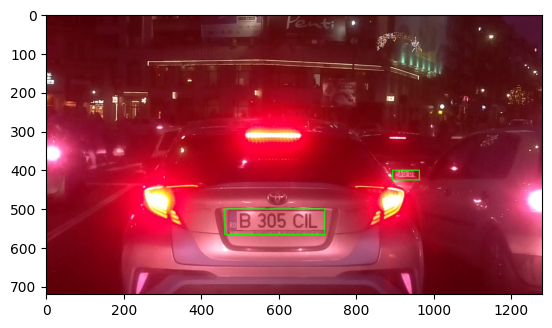

In [5]:
display_img = img.copy()

for box in bboxes:
    x, y, w, h = box
    cv2.rectangle(display_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(display_img[:,:,::-1])
plt.show()

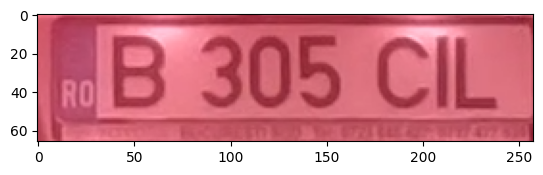

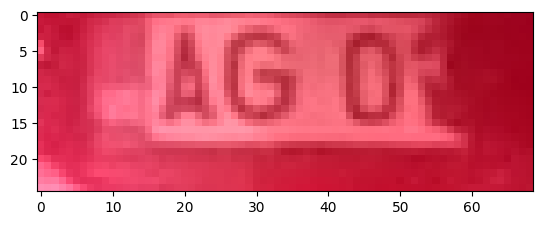

In [6]:
rois = [img[y:y+h, x:x+w] for x, y, w, h in bboxes]

# only show the license plate
for roi in rois:
    plt.imshow(roi[:,:,::-1])
    plt.show()

## TODO: perspective correction

## TODO: Make plate more readable

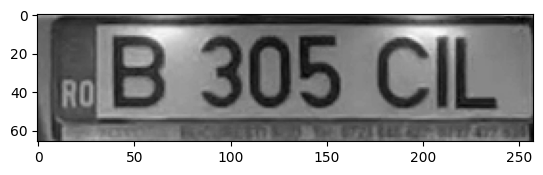

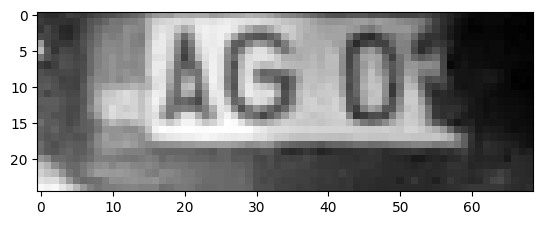

In [7]:
better_rois = []

for roi in rois:
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    better_rois.append(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

## OCR with EasyOCR

In [8]:
for roi in better_rois:
    print(reader.read(roi))

JB305CILA
AG0
